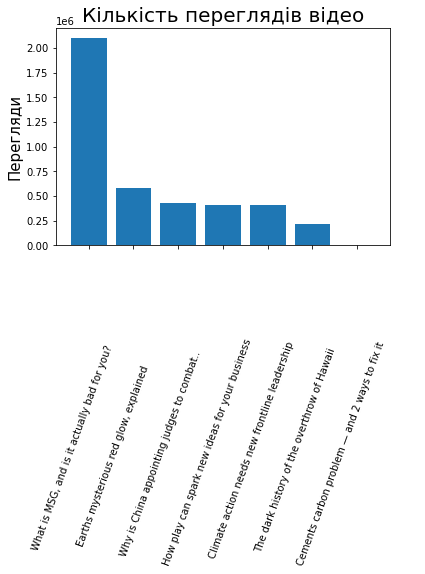

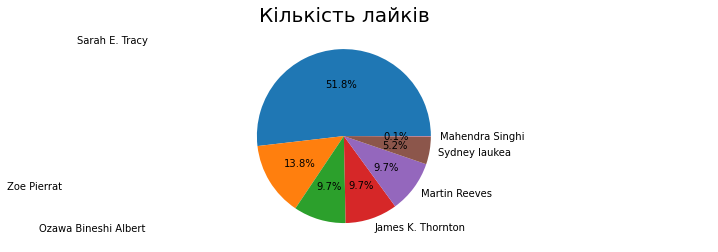

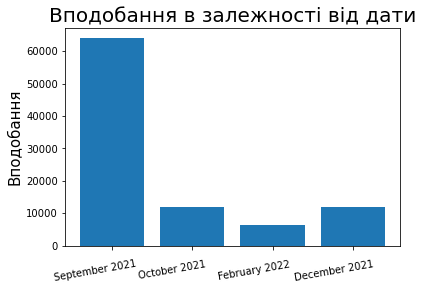

<Figure size 432x288 with 0 Axes>

In [6]:
import psycopg2
import matplotlib.pyplot as plt

username = 'postgres'
password = 'postgres'
database = 'KOVALCHUK__02'
host = 'localhost'
port = '5432'

query_1 = '''
CREATE VIEW title_views AS
select title,views from main
join date_ted ON date_ted.m_id = main.m_id
join views_likes ON views_likes.date_id = date_ted.date_id
order by 2 desc;
'''

query_2 = '''
CREATE VIEW author_likes AS 
select author,likes from main
join date_ted ON date_ted.m_id = main.m_id
join views_likes ON views_likes.date_id = date_ted.date_id
order by 2 desc;
'''

query_3 = '''
CREATE VIEW likes_date AS 
select likes,date_ted from main
join date_ted ON date_ted.m_id = main.m_id
join views_likes ON views_likes.date_id = date_ted.date_id
order by 2 desc
'''

conn1 = psycopg2.connect(user=username, password=password,
                         dbname=database, host=host, port=port)
conn2 = psycopg2.connect(user=username, password=password,
                         dbname=database, host=host, port=port)
conn3 = psycopg2.connect(user=username, password=password,
                         dbname=database, host=host, port=port)

with conn1:
    cur = conn1.cursor()

    
    cur.execute('DROP VIEW IF EXISTS title_views')
    cur.execute(query_1)
    cur.execute('SELECT * FROM title_views')

    title = []
    views = []

    for row in cur:
        title.append(row[0])
        views.append(row[1])

    plt.bar(title, views)
    plt.title('Кількість переглядів відео', size=20)
    plt.ylabel('Перегляди', size=15)
    plt.xticks(rotation=70)
    plt.show()
with conn2:
    cur = conn2.cursor()

    
    cur.execute('DROP VIEW IF EXISTS author_likes')
    cur.execute(query_2)
    cur.execute('SELECT * FROM author_likes')

    author = []
    likes = []

    for row in cur:
        author.append(row[0])
        likes.append(row[1])

    x, y = plt.subplots()
    plt.title('Кількість лайків', size=20)
    y.pie(likes, labels=author, autopct='%1.1f%%')
    plt.show()

print()
with conn3:
    cur = conn3.cursor()

    
    cur.execute('DROP VIEW IF EXISTS likes_date')
    cur.execute(query_3)
    cur.execute('SELECT * FROM likes_date')

    likes = []
    date_ted = []

    for row in cur:
        likes.append(row[0])
        date_ted.append(row[1])

    plt.bar(date_ted, likes)
    plt.title('Вподобання в залежності від дати', size=20)
    plt.ylabel('Вподобання', size=15)
    plt.xticks(rotation=10)
    plt.show()


mng = plt.get_current_fig_manager()
mng.resize(1700, 700)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.96,
                    top=0.9, wspace=0.4, hspace=0.4)

plt.show()

